In [ ]:
!pip install tensorflow==2.2.0

In [30]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.14.0


## 1.1 Load Data

Our first step is to load the data and divide it into a training and testing dataset. The CIFAR10 dataset can be downloaded directly from TensorFlow and has already been divided. Run the next cell to import the data.
``` x_train ``` is the dataset of 32x32 color images of objects that the model will be trained on.

```y_train``` is the dataset of labels that correspond to ```x_train```. 

``` x_test ``` is the dataset of 32x32 color images of objects that the model will be tested on.

```y_test``` is the dataset of labels that correspond to ```x_test```. 


In [55]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [40]:
y_train = y_train.flatten()
y_test = y_test.flatten()

## 1.2 Normalization and Reshaping

Since the values in our ```x_train``` dataset are 32x32 color images, our input shape must be specified so that our model will know what is being inputed.

The first convolution layer expects a single 50000x32x32x3 tensor instead of 50000 32x32x3 tensors.

Models generally run better on normalized values. The best way to normalize the data depends on each individual dataset. For the CIFAR10 dataset, we want each value to be between 0.0 and 1.0. As all values originally fall under the 0.0-255.0 range, divide by 255.0.

Run the following cell to define the ```input_shape``` and to normalize and reshape the data.

In [41]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

## 1.3 Label Encoding

The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, ```2``` (bird) becomes ```[0,0,1,0,0,0,0,0,0,0]``` and ```7``` (horse) becomes ```[0,0,0,0,0,0,0,1,0,0]```.

Run the following cell to transform the labels into one-hot encodings

In [42]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [43]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

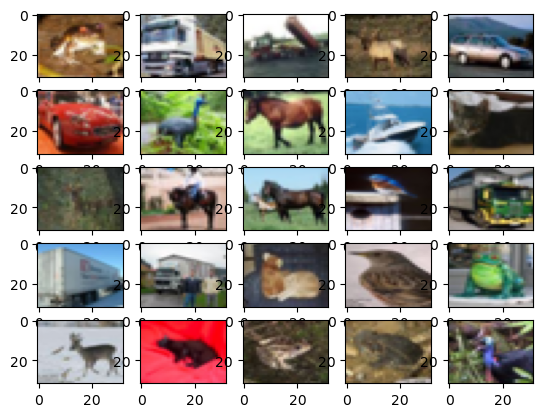

In [45]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

## 2.1 Define the Model

Run the following cell to define ```batch_size```, ```num_classes```, and ```epochs```. Try changing the values and test how different values affect the accuracy of the CNN model.

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])


In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

Run the following cell to build the model. The model contains various layers stacked on top of each other. The output of one layer feeds into the input of the next layer.

Conv2D layers are convolutions. Each filter (32 in the first two convolution layers and 64 in the next two convolution layers) transforms a part of the image (5x5 for the first two Conv2D layers and 3x3 for the next two Conv2D layers). The transformation is applied on the whole image.

MaxPool2D is a downsampling filter. It reduces a 2x2 matrix of the image to a single pixel with the maximum value of the 2x2 matrix. The filter aims to conserve the main features of the image while reducing the size.

Dropout is a regularization layer. In our model, 25% of the nodes in the layer are randomly ignores, allowing the network to learn different features. This prevents overfitting.

```relu``` is the rectifier, and it is used to find nonlinearity in the data. It works by returning the input value if the input value >= 0. If the input is negative, it returns 0.

Flatten converts the tensors into a 1D vector.

The Dense layers are an artificial neural network (ANN). The last layer returns the probability that an image is in each class (one for each digit).

As this model aims to categorize the images, we will use a ```categorical_crossentropy``` loss function. 

In [48]:

model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

## 2.2 Fit the Training Data

Testing the model on a validation dataset prevents overfitting of the data. We specified a 10% validation and 90% training split.

In [49]:
r=model.fit(x_train,y_train,batch_size=32, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8341 - acc: 0.3297
Epoch 2/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5158 - acc: 0.4518
Epoch 3/50
1563/1563 [==============================] - 99s 64ms/step - loss: 1.3781 - acc: 0.5025
Epoch 4/50
1563/1563 [==============================] - 98s 63ms/step - loss: 1.2800 - acc: 0.5451
Epoch 5/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.1977 - acc: 0.5765
Epoch 6/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1274 - acc: 0.6014
Epoch 7/50
1563/1563 [==============================] - 104s 66ms/step - loss: 1.0652 - acc: 0.6254
Epoch 8/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0173 - acc: 0.6452
Epoch 9/50
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9780 - acc: 0.6578
Epoch 10/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.9400 - acc: 0.6695
Epo

## 3.1 Loss and Accuracy Curves

Run the following cell to evaluate the loss and accuracy of our model

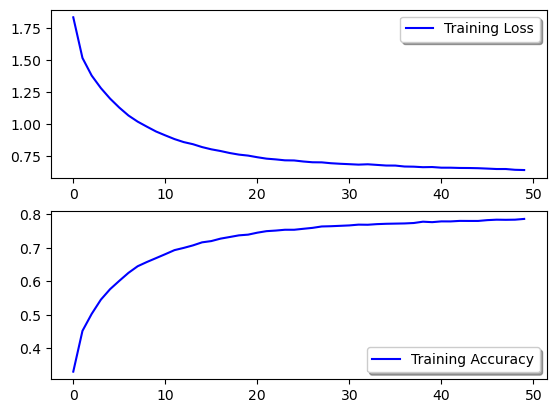

In [51]:
fig, ax = plt.subplots(2,1)
ax[0].plot(r.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(r.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 3.2 Predict Results

In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.6287 - acc: 0.7896
